In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
import numpy as np
from utils import *
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
hB,hI = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [3]:
ns = 50
schargs = {
  'concentration':1.1,
  'stickiness':1,
  'sparsity':1.0
}

dataL = []
for i in range(ns):
  task = Task()
  sem = SEM(schargs)
  exp,curr  = task.generate_experiment('blocked',200,40)
  data = sem.run_exp(exp)
  data['exp']=exp
  dataL.append(data)

In [4]:
def get_sm(xth):
  """ 
  given x_t_hat from subject
  [trial,layer,node]
  get 2afc normalized softmax for layer 2/3
  return: [trial,layer2/3,node56/78]
  """
  nodes = {2:(5,6),3:(7,8)} # (7,8) 
  L = [] # layer 2 and 3
  for l in range(2):
    y = softmax(xth[:,l+2,nodes[l+2]],-1)
    L.append(y)
  return np.array(L)

def get_acc(data):
  """ 
  returns 2afc softmax of 
  layer 2/3 transitions
  """
  ysm = get_sm(data['xth'])
  L = []
  for i in range(2):
    ysml = ysm[i]
    yt = data['exp'][:,i+3] 
    pr_yt = ysml[range(len(ysml)),yt - (5+2*i)] # 
    L.append(pr_yt)
  return np.array(L)



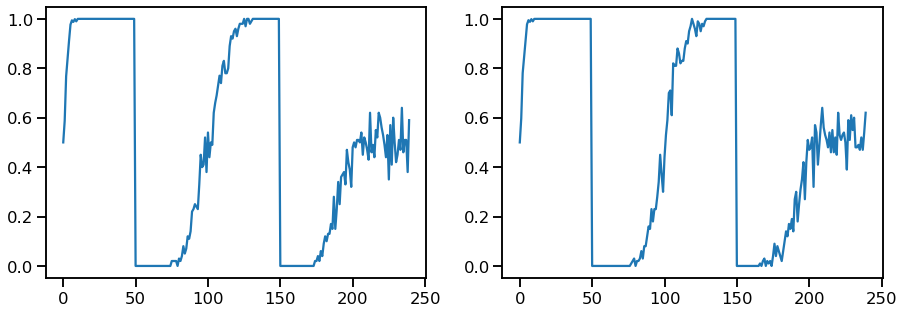

In [5]:
# layer 2 and layer 3
acc = np.array([get_acc(data) for data in dataL]) # sub,layer,trial
f,ax = plt.subplots(1,2,figsize=(15,5))
for i in range(2):
  M = acc[:,i].mean(0)
  ax[i].plot(M)


(array([   0.,    0.,    0.,    0.,    0., 1200.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

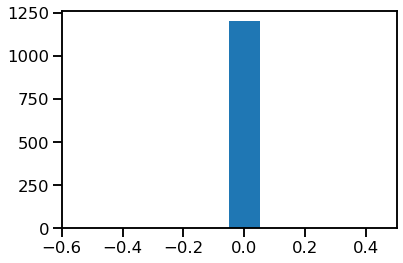

In [6]:
zt = data['zt'][:,:-1].flatten()
plt.hist(zt,align='left')

In [7]:
[np.unique(d['zt']) for d in dataL]

[array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.]),
 array([-1.,  0.])]